Module 7 Case study 3

In [104]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score

In [105]:
df = pd.read_csv('additional_resources_7_xsa_so3fyvt/loan_borrower_data.csv')
df

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9573,0,all_other,0.1461,344.76,12.180755,10.39,672,10474.000000,215372,82.1,2,0,0,1
9574,0,all_other,0.1253,257.70,11.141862,0.21,722,4380.000000,184,1.1,5,0,0,1
9575,0,debt_consolidation,0.1071,97.81,10.596635,13.09,687,3450.041667,10036,82.9,8,0,0,1
9576,0,home_improvement,0.1600,351.58,10.819778,19.18,692,1800.000000,0,3.2,5,0,0,1


In [106]:
df['credit.policy'].value_counts()

credit.policy
1    7710
0    1868
Name: count, dtype: int64

In [107]:
df.isnull().sum()

credit.policy        0
purpose              0
int.rate             0
installment          0
log.annual.inc       0
dti                  0
fico                 0
days.with.cr.line    0
revol.bal            0
revol.util           0
inq.last.6mths       0
delinq.2yrs          0
pub.rec              0
not.fully.paid       0
dtype: int64

In [108]:
df.duplicated().sum()

np.int64(0)

In [109]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   credit.policy      9578 non-null   int64  
 1   purpose            9578 non-null   object 
 2   int.rate           9578 non-null   float64
 3   installment        9578 non-null   float64
 4   log.annual.inc     9578 non-null   float64
 5   dti                9578 non-null   float64
 6   fico               9578 non-null   int64  
 7   days.with.cr.line  9578 non-null   float64
 8   revol.bal          9578 non-null   int64  
 9   revol.util         9578 non-null   float64
 10  inq.last.6mths     9578 non-null   int64  
 11  delinq.2yrs        9578 non-null   int64  
 12  pub.rec            9578 non-null   int64  
 13  not.fully.paid     9578 non-null   int64  
dtypes: float64(6), int64(7), object(1)
memory usage: 1.0+ MB


In [110]:
# label encoding - converting purpose column to numeric to find corr

encode = LabelEncoder()
df['purpose'] = encode.fit_transform(df['purpose'])
df[['purpose']]

,purpose
0,2
1,1
2,2
3,2
4,1
...,...
9573,0
9574,0
9575,2
9576,4


In [111]:
# Mapping of the encoder

dict(enumerate(encode.classes_))

{0: 'all_other',
 1: 'credit_card',
 2: 'debt_consolidation',
 3: 'educational',
 4: 'home_improvement',
 5: 'major_purchase',
 6: 'small_business'}

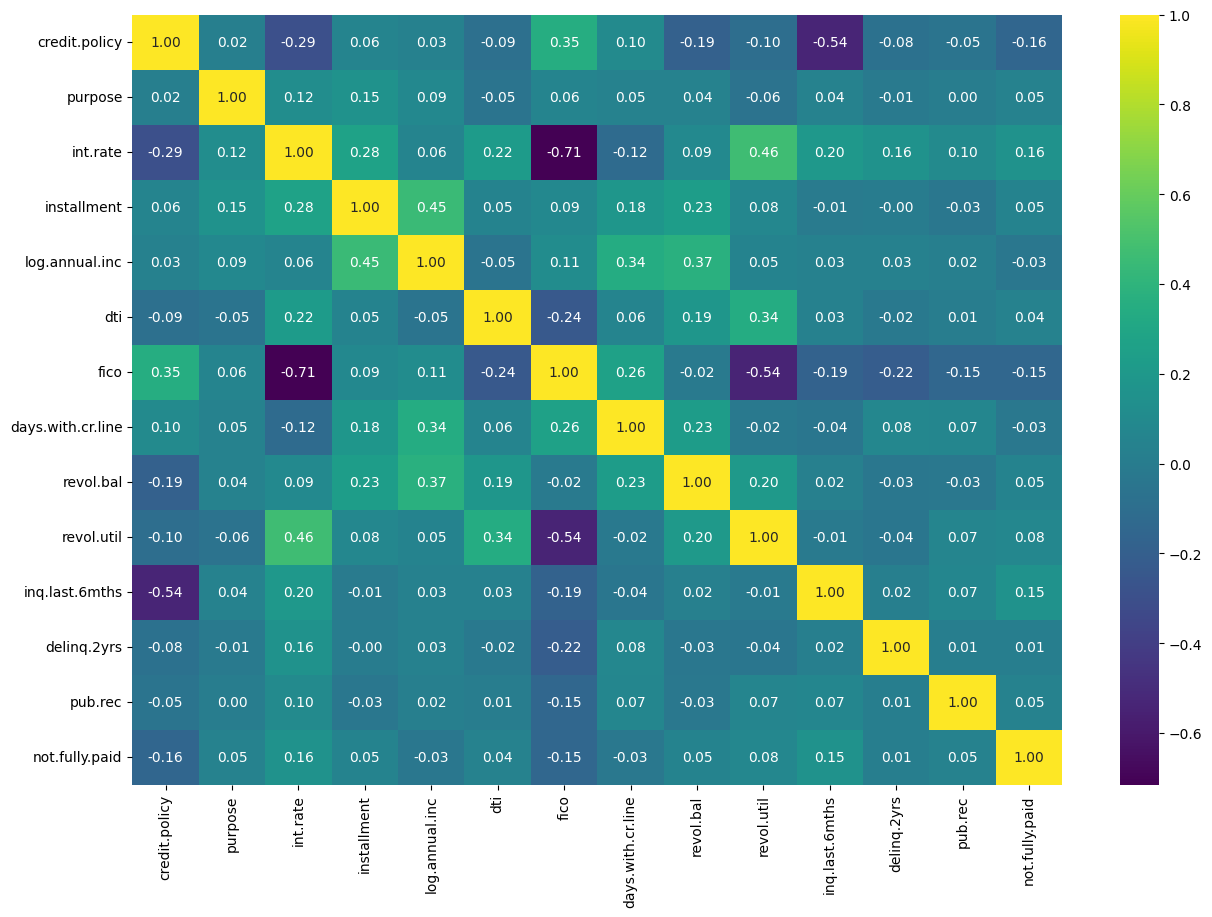

In [112]:
# heatmap to view corr

plt.figure(figsize=(15,10))
sns.heatmap(df.corr(), cbar=True, cmap='viridis', annot=True, fmt='.2f')
plt.show()

In [ ]:
# train test data split
X = df.drop('not.fully.paid', axis=1)
y = df['not.fully.paid']
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.20)

# scaling the data
scaler = StandardScaler()
X_trainscaled = scaler.fit_transform(X_train)
X_testscaled = scaler.transform(X_test)

# create and train model
model = LogisticRegression(max_iter=15000, solver='sag')
model.fit(X_trainscaled,y_train)

# predict the output
ypred = model.predict(X_testscaled)

# Accuracy
score = accuracy_score(y_test, ypred)
print(score)

# Cross validation
cv = cross_val_score(model, X, y, cv=5, scoring='accuracy').mean()
print(cv)

# AdaBoosting can also be implemented to improve the accuracy score

0.8335073068893528
0.8387969387921965


In [114]:
print(model.n_iter_)

[22]


In [115]:
df.columns

Index(['credit.policy', 'purpose', 'int.rate', 'installment', 'log.annual.inc',
       'dti', 'fico', 'days.with.cr.line', 'revol.bal', 'revol.util',
       'inq.last.6mths', 'delinq.2yrs', 'pub.rec', 'not.fully.paid'],
      dtype='object')

In [ ]:
# Prediction based on user input

user_input = np.array([])
for i in range(0,13):
    user_input = np.append(user_input, float(input('Please input the feature values in order')))

inputdf = pd.DataFrame(user_input.reshape(1,-1), columns=X_test.columns)
scaled_userinput = scaler.transform(inputdf)
result = model.predict(scaled_userinput)
if result == 0:
    print('Borrower will repay the amount completely')
elif result == 1:
    print('Borrower will not repay the amount')


# diff input - ['1' '2' '0.113' '284' '11.345' '10' '700' '38' '2000' '28' '4' '0' '0']

Borrower will repay the amount completely


In [132]:
X_test.columns

Index(['credit.policy', 'purpose', 'int.rate', 'installment', 'log.annual.inc',
       'dti', 'fico', 'days.with.cr.line', 'revol.bal', 'revol.util',
       'inq.last.6mths', 'delinq.2yrs', 'pub.rec'],
      dtype='object')

In [139]:
print(user_input,'\n')
print(scaled_userinput,'\n')
print(inputdf,'\n')
print(result)

[1.000e+00 1.000e+00 1.200e-01 4.010e+02 1.120e+01 7.720e+00 7.000e+02
 2.293e+03 3.362e+03 6.930e+01 0.000e+00 0.000e+00 0.000e+00] 

[[ 0.49010936 -0.55474937 -0.09997455  0.39378606  0.44112361 -0.7087934
  -0.28355646 -0.90839471 -0.39168587  0.78204123 -0.71092808 -0.29535019
  -0.23611985]] 

   credit.policy  purpose  int.rate  installment  log.annual.inc   dti   fico  \
0            1.0      1.0      0.12        401.0            11.2  7.72  700.0   

   days.with.cr.line  revol.bal  revol.util  inq.last.6mths  delinq.2yrs  \
0             2293.0     3362.0        69.3             0.0          0.0   

   pub.rec  
0      0.0   

[0]
